In [ ]:
# Libraries
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import io
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

## Data exploration

In [ ]:
train.shape

(250, 302)

In [ ]:
test.shape

(19750, 301)

In [ ]:
train.head()

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,-0.443,-0.338,0.416,-2.177,-0.326,0.340,1.174,-0.245,-1.070,-0.336,-0.502,0.403,-0.605,-0.280,-1.618,0.878,-0.272,0.870,2.171,-0.214,0.477,-2.092,0.835,0.621,-2.810,1.029,-0.736,0.582,-0.079,0.493,1.359,-0.177,0.406,-0.163,1.341,0.754,0.491,-1.560,-0.520,0.766,0.216,-0.510,0.101,-0.602,-0.721,-0.545,1.564,2.003,-1.940,1.285,-0.987,-1.370,1.373,-0.495,0.113,-0.523,0.053,-0.888,0.249,0.687,1.363,0.169,-1.122,1.209,0.891,0.866,0.847,-1.110,1.224,-1.302,-1.647,-0.091,0.255,0.730,-0.380,0.294,-0.725,0.844,1.002,-1.267,-0.043,1.158,0.779,-0.733,-0.501,1.841,1.459,0.847,1.926,-0.316,0.044,-0.294,0.120,-1.050,0.730,-1.001,-0.321,0.407,0.469,0.445,1.632,0.273,1.557,1.196,-0.548,-0.275,0.179,0.584,-1.873,0.928,0.720,0.885,0.044,-1.131,-1.576,0.616,1.957,-0.518,1.494,1.573,-0.484,0.590,-0.387,0.388,-1.032,-0.841,0.288,-0.230,-2.714,-0.473,0.476,-1.352,-0.922,0.329,-0.558,0.787,-1.043,-0.130,0.517,2.445,0.847,-0.636,-0.324,0.753,0.058,-1.461,-0.820,-0.076,1.127,-0.496,1.020,0.279,0.262,-0.277,-0.166,-0.089,-1.696,-0.598,-0.710,-0.431,0.355,0.966,-1.150,-0.156,0.393,-0.117,0.444,0.948,-0.608,-0.106,-0.491,-0.608,1.565,1.013,-1.391,0.807,-0.607,-0.856,1.230,0.124,-0.336,1.758,-1.649,-1.429,-1.322,-1.501,2.125,-0.572,1.178,-1.451,-0.374,2.386,1.883,0.758,0.295,1.261,-0.837,0.140,-0.183,0.756,0.616,1.371,0.820,-0.702,-1.266,0.496,-0.669,-0.325,-0.170,0.147,-1.134,0.077,1.271,-0.087,-1.431,1.640,0.694,0.949,-2.400,0.657,-0.431,0.124,-0.335,-2.820,0.573,-0.755,3.798,-0.001,0.998,-0.543,1.018,0.883,-1.037,0.513,0.694,0.856,-0.523,0.596,0.971,0.279,2.684,-0.057,-1.754,0.297,-2.196,0.798,-0.533,-0.661,0.564,-2.400,0.945,-0.971,0.055,1.107,-0.848,-1.781,0.254,-0.515,0.234,0.296,-1.774,2.032,-0.442,-0.116,1.393,-0.494,-0.179,1.874,1.463,-1.397,0.284,0.336,0.551,0.557,-0.522,-0.503,-0.541,1.393,0.506,-1.420,-0.123,-1.833,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,0.557,1.202,0.542,0.424,-1.572,-0.968,-1.483,0.564,0.047,-0.324,-1.490,0.179,-0.524,0.250,2.462,0.029,-1.399,-2.370,-1.505,-1.294,0.106,-0.145,0.235,-1.045,1.335,1.254,-0.811,1.812,0.181,-0.020,1.125,0.279,-0.682,1.161,1.194,0.243,1.179,1.338,-1.000,-0.362,-0.605,1.917,-1.157,0.394,-0.482,1.591,0.106,-0.959,0.600,-1.147,-1.064,3.080,1.057,0.947,-1.125,1.288,-0.171,1.124,-0.454,0.698,-0.028,2.208,0.014,0.872,2.286,-0.822,0.416,1.486,-0.331,-0.993,-0.071,0.543,-0.096,0.041,0.138,1.110,0.692,1.407,-0.234,-1.899,-0.131,0.934,0.802,-1.041,2.004,1.424,0.423,-0.352,-0.656,-0.053,1.036,-1.228,-0.854,-0.748,1.180,0.575,-1.472,-1.215,-0.889,0.004,-0.145,-0.933,-0.713,0.869,0.539,-0.911,-0.638,0.895,-1.896,-0.604,0.312,1.883,-0.292,-0.849,-0.453,0.894,0.339,2.095,0.336,1.290,0.057,-0.159,0.539,0.675,-1.015,-0.304,-1.301,-0.614,-1.176,0.117,0.075,-0.088,1.888,-0.119,0.434,0.135,1.779,0.5

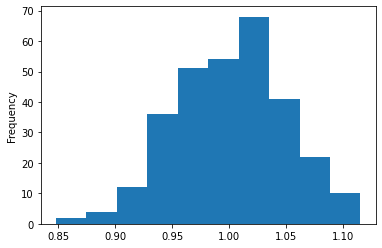

In [ ]:
# 모든 열에 대해 표준편차 분포 확인
train[train.columns[2:]].std().plot.hist()

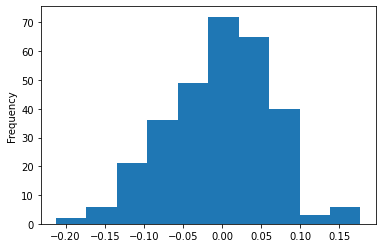

In [ ]:
# 모든 열에 대해 평균 분포 확인
train[train.columns[2:]].mean().plot.hist()

+ 모든 열의 평균값이 -0.2와 0.15 사이다.
+ 표준편차가 매우 작다.

각 항목이 서로 비슷하다고 할 수 있다.

In [ ]:
# null값 확인
train.isnull().any().any()

False

In [ ]:
train['target'].value_counts()

0.0    183
1.0     67
Name: target, dtype: int64

+ target은 약간의 불균형을 갖고 있음.

In [ ]:
# feature별 상관관계 확인
# reset_index : 기존 인덱스를 데이터 열로 추가
corrs = train.corr().abs().unstack().sort_values().reset_index()
# 같은항목 간의 상관관계 제거
corrs = corrs[corrs['level_0'] != corrs['level_1']]
corrs.tail(10)

,level_0,level_1,0
90892,219,279,0.238512
90893,279,219,0.238512
90894,23,20,0.246984
90895,20,23,0.246984
90896,146,228,0.258447
90897,228,146,0.258447
90898,6,39,0.267727
90899,39,6,0.267727
90900,127,target,0.337540
90901,target,127,0.337540


+ 항목간의 상관관계가 0.27보다 작음
+ 제거할 수 있는 상관관계가 높은 항목이 없음.

## Prepare the Data

In [ ]:
# id, target 열 삭제
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']
X_test = test.drop(['id'], axis=1)

## Basic Modeling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import GenericUnivariateSelect, SelectPercentile, SelectKBest, f_classif, mutual_info_classif, RFECV

In [ ]:
prediction = np.zeros(len(X_test))
# 점수 리스트
scores_train = []
scores_valid = []
# 라벨 분포유지 folds, 42는 관행적...
folds = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

In [ ]:
# fold별 데이터 생성
for fold_n, (train_idx, valid_idx) in enumerate(folds.split(X_train, y_train)):
  X_train_fold, X_valid_fold = X_train.loc[train_idx], X_train.loc[valid_idx]
  y_train_fold, y_valid_fold = y_train[train_idx], y_train[valid_idx]
  break

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm
# 모델 설정, L1 많은 항목있을때 유용함
model = linear_model.LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
model.fit(X_train_fold,y_train_fold)

# Receiver Operating Characteristic curve Area Under Curve
y_pred_train = model.predict(X_train_fold).reshape(-1,1)
train_score = roc_auc_score(y_train_fold,y_pred_train)

y_pred_valid = model.predict(X_valid_fold).reshape(-1,1)
valid_score = roc_auc_score(y_valid_fold,y_pred_valid)

In [ ]:
print(train_score, valid_score)

0.8720580186097429 0.763888888888889


In [ ]:
y_pred = model.predict_proba(X_test)[:,1]
y_pred

array([0.71279524, 0.52419364, 0.54384551, ..., 0.59392553, 0.37404895,
       0.47398093])

In [ ]:
def train_model(X_train, y_train, X_test, folds=folds, model=None):
  prediction = np.zeros(len(X_test))
  scores_train = []
  scores_valid = []

  for fold_n, (train_idx, valid_idx) in enumerate(folds.split(X_train,y_train)):
    X_train_fold, X_valid_fold = X_train[train_idx], X_train[valid_idx]
    y_train_fold, y_valid_fold = y_train[train_idx], y_train[valid_idx]

    model.fit(X_train_fold,y_train_fold)
    y_pred_train = model.predict(X_train_fold).reshape(-1,1)
    train_score = roc_auc_score(y_train_fold,y_pred_train)
    scores_train.append(train_score)
    
    y_pred_valid = model.predict(X_valid_fold).reshape(-1,1)
    valid_score = roc_auc_score(y_valid_fold,y_pred_valid)
    scores_valid.append(valid_score)

    # 예측 확률
    y_pred = model.predict_proba(X_test)[:,1]
    prediction += y_pred
  # 예측 평균
  prediction /= folds.get_n_splits()

  print(f'Mean train auc: {np.mean(scores_train):.4f}, std: {np.std(scores_train):.4f}.')
  print(f'Mean valid auc: {np.mean(scores_valid):.4f}, std: {np.std(scores_valid):.4f}.')
    
  return scores_valid, prediction


In [ ]:
model = linear_model.LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
scores, prediction = train_model(X_train.values, y_train, X_test, folds=folds,  model=model)

Mean train auc: 0.8784, std: 0.0105.
Mean valid auc: 0.7153, std: 0.1293.


### Different ways of splitting data into folds

+ 가장 기본적인 방법 - 무작위로 나누기(KFold)
+ classification에서 좋은 방법 - 데이터가 편향되지 않도록 분포를 유지하여 나누기(StratifiedKFold)
+ 나눈것에서 또 나눔 - (RepeatedStratifiedKFold)


In [ ]:
repeated_folds = RepeatedStratifiedKFold(n_splits=20, n_repeats=5, random_state=42)

In [ ]:
model = linear_model.LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
scores, prediction = train_model(X_train.values, y_train, X_test, folds=repeated_folds, model=model)

Mean train auc: 0.8788, std: 0.0098.
Mean valid auc: 0.7009, std: 0.1438.


## Approaches to feature selection

### ELI5
+ ML 모델들을 설명해주는 패키지
선형모델뿐만 아니라 트리기반 모델에 대해서도 설명이 가능하다.
+ 항목의 중요도 계산
+ 화이트박스

In [ ]:
!pip install eli5 shap

     |████████████████████████████████| 112kB 2.8MB/s 
     |████████████████████████████████| 276kB 7.9MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394113 sha256=f436840d983e3dc81faed99233572b8f4dec8b2824ea7d33f9694740842768a1
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
import shap

Using TensorFlow backend.


In [ ]:
# 어떤 feature가 얼마나 많은 가중치를 갖고 있는지 보여줌
eli5.show_weights(model, top=50)

Weight?,Feature
+0.620,x127
+0.226,x18
+0.197,x241
+0.128,x66
+0.101,x213
+0.100,x3
+0.092,x260
+0.089,x178
+0.074,x107
+0.029,x93


In [ ]:
# 중요한 항목의 갯수가 eli5와 동일함을 알 수 있음.
(model.coef_ != 0).sum()

34

In [ ]:
# bias를 제외한 feature들만 추출
top_features = [i[1:] for i in eli5.formatters.as_dataframe.explain_weights_df(model).feature if 'BIAS' not in i]

In [ ]:
# 계수 출력
for i, coef in enumerate(model.coef_[0]):
  if coef != 0:
    print('Feature {} has coefficient {:0.4f}'.format(i,coef))

Feature 3 has coefficient 0.0999
Feature 16 has coefficient -0.1017
Feature 18 has coefficient 0.2257
Feature 59 has coefficient -0.1867
Feature 66 has coefficient 0.1285
Feature 69 has coefficient -0.0795
Feature 74 has coefficient -0.1185
Feature 80 has coefficient -0.0625
Feature 93 has coefficient 0.0290
Feature 103 has coefficient 0.0157
Feature 107 has coefficient 0.0744
Feature 113 has coefficient -0.1604
Feature 126 has coefficient -0.1753
Feature 127 has coefficient 0.6198
Feature 133 has coefficient -0.1605
Feature 134 has coefficient -0.0274
Feature 135 has coefficient -0.1899
Feature 159 has coefficient -0.0207
Feature 176 has coefficient -0.2529
Feature 177 has coefficient -0.0438
Feature 178 has coefficient 0.0888
Feature 180 has coefficient 0.0071
Feature 189 has coefficient -0.0521
Feature 199 has coefficient -0.1947
Feature 200 has coefficient -0.1188
Feature 208 has coefficient 0.0223
Feature 211 has coefficient 0.0207
Feature 213 has coefficient 0.1012
Feature 220 ha

+ 모델이 계수가 없거나 중요한 feature가 없는경우 eli5는 작동하지 않음 ex) SVC

In [ ]:
# 중요한 feature로만 설정
X_train_selected = train[top_features]
y_train = train['target']
X_test_selected = test[top_features]

In [ ]:
model = linear_model.LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
scores, prediction = train_model(X_train_selected.values, y_train, X_test_selected, folds=repeated_folds, model=model)

Mean train auc: 0.8764, std: 0.0113.
Mean valid auc: 0.7331, std: 0.1403.


+ valid set에 대해 성능이 향상된것을 볼 수 있다.

### Permutation Importance

데이터가 테이블 형식일 때 훈련된 estimator에 사용할 수 있는 모델 검사 기술	 

* 모델을 훈련 시킨다
* 하나의 validation data 열을 무작위로 섞고 점수를 계산한다
* 점수가 크게 떨어지면 그 항목이 중요하다.

In [ ]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']
X_test = test.drop(['id'], axis=1)
model = linear_model.LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
scores, prediction = train_model(X_train.values, y_train, X_test, folds=repeated_folds,  model=model)

Mean train auc: 0.8788, std: 0.0098.
Mean valid auc: 0.7009, std: 0.1438.


In [ ]:
# Permutation Importance를 적용하고 가중치 확인
perm = PermutationImportance(model, random_state=1).fit(X_train,y_train)
eli5.show_weights(perm,top=50)

Weight,Feature
0.0880 ± 0.0320,x127
0.0232 ± 0.0118,x133
0.0192 ± 0.0178,x176
0.0176 ± 0.0082,x199
0.0112 ± 0.0155,x18
0.0088 ± 0.0128,x107
0.0088 ± 0.0163,x271
0.0064 ± 0.0165,x74
0.0064 ± 0.0241,x59
0.0056 ± 0.0256,x135


In [ ]:
# 가중치가 0이 아닌것들만 추출
selected_weights = eli5.formatters.as_dataframe.explain_weights_df(perm).loc[eli5.formatters.as_dataframe.explain_weights_df(perm)['weight'] != 0]

In [ ]:
# 그 중 bias를 제외한 feature 추출 후 학습
top_features = [i[1:] for i in selected_weights.feature if 'BIAS' not in i]
X_train_selected = train[top_features]
y_train = train['target']
X_test_selected = test[top_features]

In [ ]:
model = linear_model.LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
scores, prediction = train_model(X_train_selected.values, y_train, X_test_selected, folds=repeated_folds, model=model)

Mean train auc: 0.8763, std: 0.0115.
Mean valid auc: 0.7344, std: 0.1406.


### SHAP
+ Shapley Additive Explanations
+ 이것 또한 모델들에 대한 설명을 제공함.
+ 모델에 입력되는 각 항목들의 기여를 설명.

explainer를 사용해서 shap value를 얻는다.

In [ ]:
model = linear_model.LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
scores, prediction = train_model(X_train.values, y_train, X_test, folds=repeated_folds, model=model)

Mean train auc: 0.8787, std: 0.0098.
Mean valid auc: 0.7009, std: 0.1438.


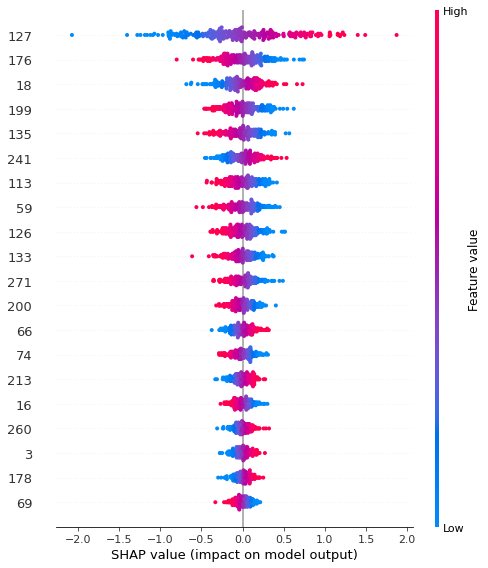

In [ ]:
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

+ 각 행은 항목을 나타냄.
+ 왼쪽은 negative, 오른쪽은 positive
+ 색상은 실제 항목값(파란색 - 낮은값, 빨간색 - 높은값)
+ ex) 위에서 2번째 항목이 건강에 대한 나이라면 빨간색은 노인 파란색은 젊은이를 나타냄. 즉, 젊은것이 건강에 positive한 영향을 준다.
### Recursive feature elimination

In [ ]:
# 너무 많은 항목이 있는 경우 중요한 feature만 남도록 줄여가며 학습
def train_model_with_feature_selection(X_train, y_train, X_test, folds=folds, model=None, feature_selector=None):
  perdiction = np.zeros(len(X_test))
  scores_train = []
  scores_valid = []
  for fold_n, (train_idx, valid_idx) in enumerate(folds.split(X_train,y_train)):
    X_train_fold, X_valid_fold = X_train[train_idx], X_train[valid_idx]
    y_train_fold, y_valid_fold = y_train[train_idx], y_train[valid_idx]
    X_test_copy = X_test.copy()

    feature_selector.fit(X_train_fold,y_train_fold)
    X_train_fold = feature_selector.transform(X_train_fold)
    X_valid_fold = feature_selector.transform(X_valid_fold)
    X_test_copy = feature_selector.transform(X_test_copy)

    model.fit(X_train_fold,y_train_fold)
    y_pred_train = model.predict(X_train_fold).reshape(-1,1)
    train_score = roc_auc_score(y_train_fold, y_pred_train)
    scores_train.append(train_score)

    y_pred_valid = model.predict(X_valid_fold).reshape(-1,1)
    valid_score = roc_auc_score(y_valid_fold, y_pred_valid)
    scores_valid.append(valid_score)

    y_pred = model.predict_proba(X_test_copy)[:,1]
    perdiction += y_pred
    
  perdiction /= folds.get_n_splits()
  
  print(f'Mean train auc: {np.mean(scores_train):.4f}, std: {np.std(scores_train):.4f}.')
  print(f'Mean valid auc: {np.mean(scores_valid):.4f}, std: {np.std(scores_valid):.4f}.')
    
  return scores_valid, perdiction


In [ ]:
model = linear_model.LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
# min_features_to_select : 선택할 최소 feature 수
# step : 1>= step 인 경우 각 반복에서 제거할 항목의 수, 1 > step인 경우 제거할 항목의 백분율
feature_selector = RFECV(model, min_features_to_select=10, scoring='roc_auc', step=0.1, verbose=0, cv=repeated_folds, n_jobs=-1)
scores, prediction = train_model_with_feature_selection(X_train.values, y_train, X_test, folds=repeated_folds, model=model, feature_selector=feature_selector)

Mean train auc: 0.8759, std: 0.0167.
Mean valid auc: 0.6993, std: 0.1467.


## Comparing Models
+ default parameter 학습 수행
+ best feature 선택
+ grid search 수행
+ best model 찾기

In [80]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

In [81]:
# Logistic Regression
model = linear_model.LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
print('Default scores')
scores, prediction = train_model(X_train.values, y_train, X_test, folds=folds, model=model)
print()
top_features = [i[1:] for i in eli5.formatters.as_dataframe.explain_weights_df(model).feature if 'BIAS' not in i]
X_train_selected = train[top_features]
y_train = train['target']
X_test_selected = test[top_features]

lr = linear_model.LogisticRegression(max_iter=1000)

parameter_grid = {'class_weight' : ['balanced', None],
                  'penalty' : ['l2', 'l1'],
                  'C' : [0.001, 0.05, 0.08, 0.01, 0.1, 1.0, 10.0],
                  'solver': ['liblinear']
                 }

grid_search = GridSearchCV(lr, param_grid=parameter_grid, cv=folds, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)
print(f'Best score of GridSearchCV: {grid_search.best_score_}')
print(f'Best parameters: {grid_search.best_params_}')

print()
scores_logreg, prediction = train_model(X_train_selected.values, y_train, X_test_selected, folds=repeated_folds, model=grid_search.best_estimator_)

Default scores
Mean train auc: 0.8784, std: 0.0105.
Mean valid auc: 0.7153, std: 0.1293.

Best score of GridSearchCV: 0.931574074074074
Best parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

Mean train auc: 0.9346, std: 0.0068.
Mean valid auc: 0.8692, std: 0.1035.


In [83]:
# Adaboost(adaptive boosting)
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
print('Default scores')
scores, prediction = train_model(X_train.values, y_train, X_test, folds=folds, model=model)
print()
top_features = [i[1:] for i in eli5.formatters.as_dataframe.explain_weights_df(model).feature if 'BIAS' not in i]
X_train_selected = train[top_features]
y_train = train['target']
X_test_selected = test[top_features]


abc = AdaBoostClassifier()

parameter_grid = {'n_estimators': [5, 10, 20, 50, 100],
                  'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0]
                 }

grid_search = GridSearchCV(abc, param_grid=parameter_grid, cv=folds, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)
print(f'Best score of GridSearchCV: {grid_search.best_score_}')
print(f'Best parameters: {grid_search.best_params_}')

print()
scores_abc, prediction = train_model(X_train_selected.values, y_train, X_test_selected, folds=repeated_folds, model=grid_search.best_estimator_)

Default scores
Mean train auc: 1.0000, std: 0.0000.
Mean valid auc: 0.5526, std: 0.1483.

Best score of GridSearchCV: 0.6804629629629629
Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}

Mean train auc: 0.9652, std: 0.0191.
Mean valid auc: 0.5701, std: 0.1127.


In [84]:
# SGD classifier
# 초기학습 속도 = 1
# 학습 데이터 사용 횟수
# tol 중지 종류
model = linear_model.SGDClassifier(eta0=1, max_iter=1000, tol=0.0001, loss='modified_huber')
print('Default scores')
scores, prediction = train_model(X_train.values, y_train, X_test, folds=folds, model=model)
print()
top_features = [i[1:] for i in eli5.formatters.as_dataframe.explain_weights_df(model).feature if 'BIAS' not in i]
X_train_selected = train[top_features]
y_train = train['target']
X_test_selected = test[top_features]

sgd = linear_model.SGDClassifier(eta0=1, max_iter=1000, tol=0.0001)

parameter_grid = {'loss': ['log', 'modified_huber'],
                  'penalty': ['l1', 'l2', 'elasticnet'],
                  'alpha': [0.001, 0.01, 0.1, 0.5], # 정규화 상수
                  'l1_ratio': [0, 0.15, 0.5, 1.0],
                  'learning_rate': ['optimal', 'invscaling', 'adaptive']
                 }

grid_search = GridSearchCV(sgd, param_grid=parameter_grid, cv=folds, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)
print(f'Best score of GridSearchCV: {grid_search.best_score_}')
print(f'Best parameters: {grid_search.best_params_}')

print()
scores_sgd, prediction = train_model(X_train_selected.values, y_train, X_test_selected, folds=repeated_folds, model=grid_search.best_estimator_)

Default scores
Mean train auc: 0.9940, std: 0.0063.
Mean valid auc: 0.5990, std: 0.1535.

Best score of GridSearchCV: 0.787037037037037
Best parameters: {'alpha': 0.1, 'l1_ratio': 0.5, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'penalty': 'l1'}

Mean train auc: 0.8381, std: 0.0156.
Mean valid auc: 0.6259, std: 0.1524.


In [86]:
# SVC
from sklearn.svm import SVC
model = SVC(probability=True, gamma='scale')
print('Default scores')
scores, prediction = train_model(X_train.values, y_train, X_test, folds=folds, model=model)
print()
# SVC는 계수나 항목 중요도가 없기때문에 permutation importance 사용
perm = PermutationImportance(model, random_state=1).fit(X_train, y_train)
selected_weights = eli5.formatters.as_dataframe.explain_weights_df(perm).loc[eli5.formatters.as_dataframe.explain_weights_df(perm)['weight'] != 0]
top_features = [i[1:] for i in selected_weights.feature if 'BIAS' not in i]
X_train_selected = train[top_features]
y_train = train['target']
X_test_selected = test[top_features]

svc = SVC(probability=True, gamma='scale')

parameter_grid = {'C': [0.01, 0.1, 1.0, 10.0, 100.0],  # 정규화 매개변수
                  'kernel': ['linear', 'poly', 'rbf'],
                 }

grid_search = GridSearchCV(svc, param_grid=parameter_grid, cv=folds, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)
print(f'Best score of GridSearchCV: {grid_search.best_score_}')
print(f'Best parameters: {grid_search.best_params_}')

print()
scores_svc, prediction = train_model(X_train_selected.values, y_train, X_test_selected, folds=repeated_folds, model=grid_search.best_estimator_)

Default scores
Mean train auc: 0.9674, std: 0.0087.
Mean valid auc: 0.5000, std: 0.0000.

Best score of GridSearchCV: 0.7088888888888889
Best parameters: {'C': 10.0, 'kernel': 'rbf'}

Mean train auc: 1.0000, std: 0.0000.
Mean valid auc: 0.5029, std: 0.0507.


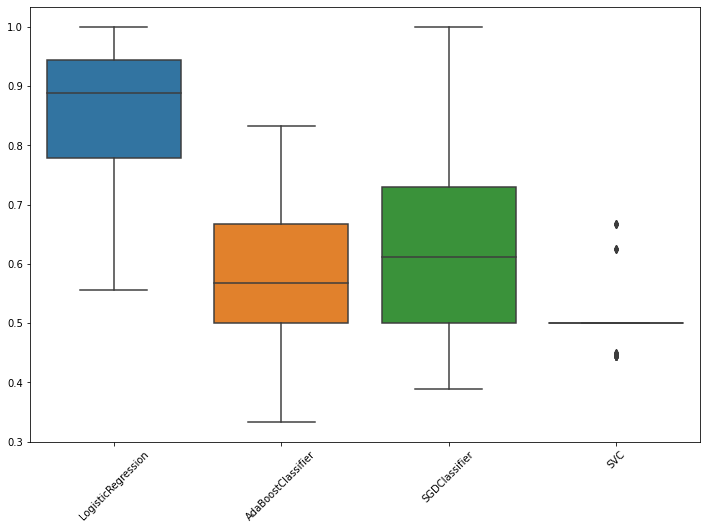

In [87]:
plt.figure(figsize=(12, 8));
scores_df = pd.DataFrame({'LogisticRegression': scores_logreg})
scores_df['AdaBoostClassifier'] = scores_abc
scores_df['SGDClassifier'] = scores_sgd
scores_df['SVC'] = scores_svc

sns.boxplot(data=scores_df);
plt.xticks(rotation=45);

## Feature Engineering

In [ ]:
X_train['mean'] = X_train.mean(axis=1)
X_train['kurt'] = X_train.kurt(axis=1)  # 첨도(뾰족한 정도)
X_train['mad'] = X_train.mad(axis=1)  # 절대 편차
X_train['median'] = X_train.median(axis=1)  # 중간값
X_train['max'] = X_train.max(axis=1) 
X_train['min'] = X_train.min(axis=1)
X_train['skew'] = X_train.skew(axis=1)  # 샘플 분포의 비대칭도
X_train['sem'] = X_train.sem(axis=1)  # 표본 분포의 표준편차, 표준오차

X_test['mean'] = X_test.mean(axis=1)
X_test['kurt'] = X_test.kurt(axis=1)
X_test['mad'] = X_test.mad(axis=1)
X_test['median'] = X_test.median(axis=1)
X_test['max'] = X_test.max(axis=1) 
X_test['min'] = X_test.min(axis=1)
X_test['skew'] = X_test.skew(axis=1)
X_test['sem'] = X_test.sem(axis=1)

In [ ]:
from operator import itemgetter
model = linear_model.LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
print('Default scores')
scores, prediction = train_model(X_train.values, y_train, X_test, folds=folds, model=model)
print()
# bias를 제외하고 영향력이 큰 feature 추출
top_features = itemgetter([int(i[1:]) for i in eli5.formatters.as_dataframe.explain_weights_df(model).feature if 'BIAS' not in i])(X_train.columns)
X_train_selected = X_train[top_features]
y_train = train['target']
X_test_selected = X_test[top_features]

lr = linear_model.LogisticRegression(max_iter=1000)

#  gird search를 위함
parameter_grid = {'class_weight' : ['balanced', None],
                  'penalty' : ['l2', 'l1'],
                  'C' : [0.001, 0.05, 0.08, 0.01, 0.1, 1.0, 10.0],
                  'solver': ['liblinear']
                 }

grid_search = GridSearchCV(lr, param_grid=parameter_grid, cv=folds, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)
print(f'Best score of GridSearchCV: {grid_search.best_score_}')
print(f'Best parameters: {grid_search.best_params_}')

print()
# 가장 우수한 모델의 결과
scores_logreg, prediction = train_model(X_train_selected.values, y_train, X_test_selected, folds=repeated_folds, model=grid_search.best_estimator_)

Default scores
Mean train auc: 0.8928, std: 0.0089.
Mean valid auc: 0.7019, std: 0.1691.

Best score of GridSearchCV: 0.9427777777777777
Best parameters: {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

Mean train auc: 0.9428, std: 0.0093.
Mean valid auc: 0.8511, std: 0.1231.


## Scaling Data

In [ ]:
X_train = train.drop(['id','target'],axis=1)
y_train = train['target']
X_test = test.drop(['id'],axis=1)

In [ ]:
sc = StandardScaler()
# train + test
data = StandardScaler().fit_transform(np.concatenate((X_train,X_test),axis=0))
X_train.iloc[:,:] = data[:250]
X_test.iloc[:,:] = data[250:]

In [ ]:
model = linear_model.LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
print('Default scores')
scores, prediction = train_model(X_train.values, y_train, X_test, folds=folds, model=model)
print()
top_features = itemgetter([int(i[1:]) for i in eli5.formatters.as_dataframe.explain_weights_df(model).feature if 'BIAS' not in i])(X_train.columns)
X_train_selected = X_train[top_features]
y_train = train['target']
X_test_selected = X_test[top_features]

lr = linear_model.LogisticRegression(max_iter=1000)

parameter_grid = {'class_weight' : ['balanced', None],
                  'penalty' : ['l2', 'l1'],
                  'C' : [0.001, 0.05, 0.08, 0.01, 0.1, 1.0, 10.0],
                  'solver': ['liblinear']
                 }

grid_search = GridSearchCV(lr, param_grid=parameter_grid, cv=folds, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)
print(f'Best score of GridSearchCV: {grid_search.best_score_}')
print(f'Best parameters: {grid_search.best_params_}')

print()
scores_logreg, prediction = train_model(X_train_selected.values, y_train, X_test_selected, folds=repeated_folds, model=grid_search.best_estimator_)

Default scores
Mean train auc: 0.8786, std: 0.0106.
Mean valid auc: 0.7069, std: 0.1438.

Best score of GridSearchCV: 0.9255555555555557
Best parameters: {'C': 0.05, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

Mean train auc: 0.9288, std: 0.0065.
Mean valid auc: 0.8643, std: 0.1070.


In [77]:
from google.colab import files
import io
uploaded = files.upload()
submission = pd.read_csv(io.BytesIO(uploaded['sample_submission.csv']))
submission['target'] = prediction
submission.to_csv('submission.csv', index=False)
files.download('submission.csv')

Saving sample_submission.csv to sample_submission.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>